# Autoencoder

Autohenodery to sieci neuronowe zdolne do uczenia się wydajnych reprezentacji danych wejściowych, nazywanymi **codings** kodami, bez żadnego nadzoru. Te kody mają zazwyczaj znacznie mniejszą wymiarowość niż dane wejściowe, dzięki czemu autoenodemy są przydatne do redukcji wymiarów. 

Co ważniejsze, autoenodemy pełnią funkcję detektorów cech i mogą być używane jako ekstraktory cech (feature detectors) w głębokich sieciach neuronowe. 

Wreszcie są w stanie generować nowe dane, które wyglądają bardzo podobnie do danych uczących (nazywa się to modelem generatywnym). Możesz na przykład nauczyć autocenoder na zdjęciach twarzy, a następnie generować nowe twarze.


## Data Representations


Autoenoder zawsze składa się z dwóch części: 

  * enkodera, który konwertuje wejścia do nowej (wewnętrznwj) reprezentacji,
  * dekodera (lub sieci generatywna), który konwertuje wewnętrzną reprezentację na wyjścia.
  
Jak widać, autoenoderer zazwyczaj ma taką samą architekturę jak Perceptron wielowarstwowy (MLP), z tym że liczba neuronów w warstwie wyjściowej musi być równa liczbie wejść. 

W poniższym przykładzie istnieje tylko jedna ukryta warstwa złożona z dwóch neuronów (kodera) i jedna warstwa wyjściowa złożona z trzech neuronów (dekoder). Wyjścia są często nazywane **reconstructions** (rekonstrukcjami), ponieważ autoenoder próbuje zrekonstruować wejścia, a funkcja kosztu zawiera **reconstruction loss** (niedoskonałość rekonstrukcji), która karze model, gdy rekonstrukcje różnią się od wejść.  

## Wykonywanie PCA za pomocą autoenodera

Jeśli autoenoder wykorzystuje tylko aktywacje liniowe, a funkcja kosztu to błąd średniej kwadratowej (MSE), wówczas otrzymujemy PCA. Poniższy kod tworzy prosty liniowy autoencoder, aby wykonać PCA na zestawie danych 3D, wyświetlając go w 2D:

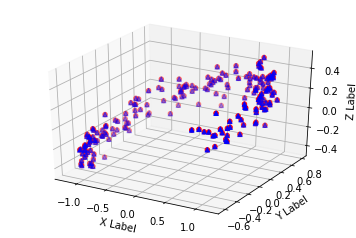

In [61]:
import numpy as np
import numpy.random as rnd
import os
import sys


rnd.seed(4)
m = 200
w1, w2 = 0.1, 0.3
noise = 0.1

angles = rnd.rand(m) * 3 * np.pi / 2 - 0.5
data = np.empty((m, 3))
data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * rnd.randn(m) / 2
data[:, 1] = np.sin(angles) * 0.7 + noise * rnd.randn(m) / 2
data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * rnd.randn(m)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = data[:, 0]
    ys = data[:, 1]
    zs = data[:, 2]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


# Zad
Wykonajs skalowanie danych
```python
from sklearn.preprocessing import StandardScaler
```

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(data[:100])
X_test = scaler.transform(data[100:])

In [151]:
def rec_error(x, y):
    diff = tf.layers.flatten(x) - tf.layers.flatten(y)
    return tf.reduce_mean(tf.reduce_sum(tf.square(diff), axis=1))

In [64]:
import tensorflow as tf

tf.reset_default_graph()

n_inputs = 3
n_hidden = 2  # codings
n_outputs = n_inputs

learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden = tf.layers.dense(X, n_hidden)
outputs = tf.layers.dense(hidden, n_outputs)

reconstruction_loss = rec_error(outputs, X)

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(reconstruction_loss)



In [65]:
init = tf.global_variables_initializer()

n_iterations = 1000
codings = hidden

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        print("iteration ", iteration)
        training_op.run(feed_dict={X: X_train})
    codings_val = codings.eval(feed_dict={X: X_test})

iteration  0
iteration  1
iteration  2
iteration  3
iteration  4
iteration  5
iteration  6
iteration  7
iteration  8
iteration  9
iteration  10
iteration  11
iteration  12
iteration  13
iteration  14
iteration  15
iteration  16
iteration  17
iteration  18
iteration  19
iteration  20
iteration  21
iteration  22
iteration  23
iteration  24
iteration  25
iteration  26
iteration  27
iteration  28
iteration  29
iteration  30
iteration  31
iteration  32
iteration  33
iteration  34
iteration  35
iteration  36
iteration  37
iteration  38
iteration  39
iteration  40
iteration  41
iteration  42
iteration  43
iteration  44
iteration  45
iteration  46
iteration  47
iteration  48
iteration  49
iteration  50
iteration  51
iteration  52
iteration  53
iteration  54
iteration  55
iteration  56
iteration  57
iteration  58
iteration  59
iteration  60
iteration  61
iteration  62
iteration  63
iteration  64
iteration  65
iteration  66
iteration  67
iteration  68
iteration  69
iteration  70
iteration  71
it

iteration  625
iteration  626
iteration  627
iteration  628
iteration  629
iteration  630
iteration  631
iteration  632
iteration  633
iteration  634
iteration  635
iteration  636
iteration  637
iteration  638
iteration  639
iteration  640
iteration  641
iteration  642
iteration  643
iteration  644
iteration  645
iteration  646
iteration  647
iteration  648
iteration  649
iteration  650
iteration  651
iteration  652
iteration  653
iteration  654
iteration  655
iteration  656
iteration  657
iteration  658
iteration  659
iteration  660
iteration  661
iteration  662
iteration  663
iteration  664
iteration  665
iteration  666
iteration  667
iteration  668
iteration  669
iteration  670
iteration  671
iteration  672
iteration  673
iteration  674
iteration  675
iteration  676
iteration  677
iteration  678
iteration  679
iteration  680
iteration  681
iteration  682
iteration  683
iteration  684
iteration  685
iteration  686
iteration  687
iteration  688
iteration  689
iteration  690
iteration 

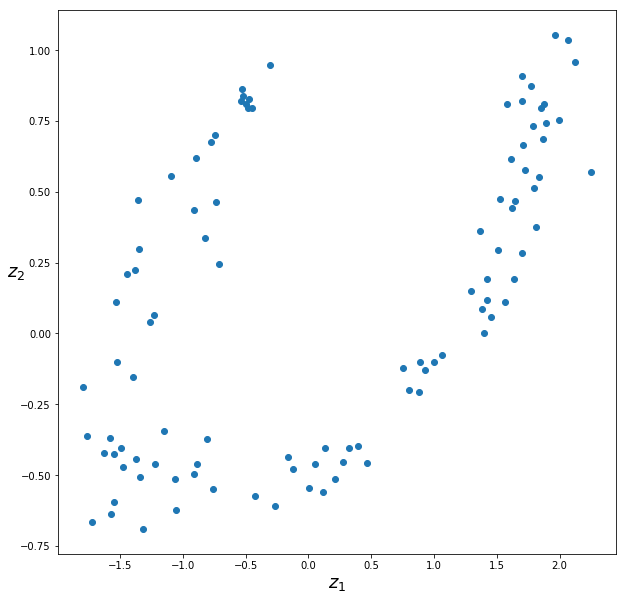

In [66]:
fig = plt.figure(figsize=(10,10))
plt.plot(codings_val[:,0], codings_val[:, 1], "o")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.show()

Ten kod nie różni się bardzo od MLP. Dwie rzeczy do zapamiętania to:
  
  * Liczba wyjść jest równa liczbie wejść.
  * Aby wykonać prosty PCA, ustawiamy activation_fn = None (tj. Wszystkie neurony są liniowe), a funkcją kosztu jest MSE.

# Zad

Dla danych iris wykonaj redukcję wymiarowości za pomocą autoencodera.
Następnie wykonaj algorytm PCA i porównaj wyniki.

In [67]:
from sklearn.decomposition import PCA 
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X_train = iris.data
y_train = iris.target
print(X_train.shape)

(150, 4)


In [68]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

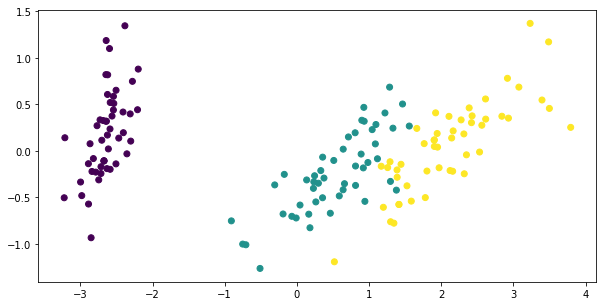

In [69]:
fig = plt.figure(figsize=(10,5))
plt.scatter(X_train_pca[:,0], X_train_pca[:, 1], c = y_train)
plt.show()

In [70]:
import tensorflow as tf

tf.reset_default_graph()

n_inputs = 4
n_hidden = 2  # codings
n_outputs = n_inputs

learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden = tf.layers.dense(X, n_hidden)
outputs = tf.layers.dense(hidden, n_outputs)

reconstruction_loss = rec_error(outputs, X)

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(reconstruction_loss)

In [71]:
init = tf.global_variables_initializer()

n_iterations = 1000
codings = hidden

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        print("iteration ", iteration)
        training_op.run(feed_dict={X: X_train})
    codings_val = codings.eval(feed_dict={X: X_train})

iteration  0
iteration  1
iteration  2
iteration  3
iteration  4
iteration  5
iteration  6
iteration  7
iteration  8
iteration  9
iteration  10
iteration  11
iteration  12
iteration  13
iteration  14
iteration  15
iteration  16
iteration  17
iteration  18
iteration  19
iteration  20
iteration  21
iteration  22
iteration  23
iteration  24
iteration  25
iteration  26
iteration  27
iteration  28
iteration  29
iteration  30
iteration  31
iteration  32
iteration  33
iteration  34
iteration  35
iteration  36
iteration  37
iteration  38
iteration  39
iteration  40
iteration  41
iteration  42
iteration  43
iteration  44
iteration  45
iteration  46
iteration  47
iteration  48
iteration  49
iteration  50
iteration  51
iteration  52
iteration  53
iteration  54
iteration  55
iteration  56
iteration  57
iteration  58
iteration  59
iteration  60
iteration  61
iteration  62
iteration  63
iteration  64
iteration  65
iteration  66
iteration  67
iteration  68
iteration  69
iteration  70
iteration  71
it

iteration  650
iteration  651
iteration  652
iteration  653
iteration  654
iteration  655
iteration  656
iteration  657
iteration  658
iteration  659
iteration  660
iteration  661
iteration  662
iteration  663
iteration  664
iteration  665
iteration  666
iteration  667
iteration  668
iteration  669
iteration  670
iteration  671
iteration  672
iteration  673
iteration  674
iteration  675
iteration  676
iteration  677
iteration  678
iteration  679
iteration  680
iteration  681
iteration  682
iteration  683
iteration  684
iteration  685
iteration  686
iteration  687
iteration  688
iteration  689
iteration  690
iteration  691
iteration  692
iteration  693
iteration  694
iteration  695
iteration  696
iteration  697
iteration  698
iteration  699
iteration  700
iteration  701
iteration  702
iteration  703
iteration  704
iteration  705
iteration  706
iteration  707
iteration  708
iteration  709
iteration  710
iteration  711
iteration  712
iteration  713
iteration  714
iteration  715
iteration 

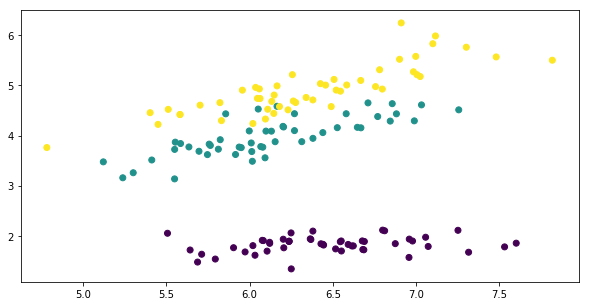

In [72]:
fig = plt.figure(figsize=(10,5))
plt.scatter(codings_val[:,0], codings_val[:, 1], c = y_train)
plt.show()

## Deep autoenkoder

Podobnie jak inne sieci neuronowe, o których mówiliśmy, autoenkodery mogą mieć wiele ukrytych warstw. W tym przypadku są one nazywane **deep autoenkoder** lub **stacked autoencoders**. 

Dodanie kolejnych warstw pomaga autoenkoderowi uzyskać bardziej złożone kodowanie. Należy jednak uważać, aby nie spowodować, aby autoenkoder był zbyt mocny. Wyobraź sobie enkoder tak potężny, że uczy się mapować każde wejście na jedną dowolną liczbę (a dekoder uczy odwrotnego mapowania). Oczywiście taki autoenkoder idealnie zrekonstruuje dane treningowe, ale nie nauczy się żadnej użytecznej reprezentacji danych (i jest mało prawdopodobne, aby generalizować dobrze nowe instancje).

Architektura głębokich autoenkoderó jest zwykle symetryczna w odniesieniu do centralnej ukrytej warstwy (warstwy kodującej). 

Na przykład, autoenoder do danych MNIST może mieć 784 neuronów wejścia, następnie ukryta warstwa z 300 neuronami, następnie centralna ukryta warstwa z 150 neuronów, następnie kolejna ukryta warstwa z 300 neuronami i warstwa wyjściowa z 784 neuronami. 

In [73]:
###########################################################################################
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../data/MNIST_data/", one_hot=True)
###########################################################################################

Extracting ../data/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [74]:
# def euclidean_norm_squared(X, axis=None):
#     return tf.reduce_sum(tf.square(X), axis=axis)

# def mean_squared_euclidean_norm_reconstruction_error(input, output):
#     return tf.reduce_mean(euclidean_norm_squared(input - output, axis=1))

In [182]:
print(mnist.train.images.shape)
print(mnist.validation.images.shape)

(55000, 784)
(5000, 784)


In [105]:
tf.reset_default_graph()

from functools import partial

n_inputs = 28 * 28
n_hidden1 = 200
n_hidden2 = 200
n_hidden3 = 200  # codings
z_dim = 8
n_hidden4 = n_hidden3
n_hidden5 = n_hidden2
n_hidden6 = n_hidden1
n_outputs = n_inputs
learning_rate = 0.01

initializer = tf.contrib.layers.variance_scaling_initializer()

my_dense_layer = partial(
    tf.layers.dense,
    activation=tf.nn.relu,
    kernel_initializer=initializer)

X = tf.placeholder(tf.float32, [None, n_inputs])
hidden1 = my_dense_layer(X, n_hidden1)
hidden2 = my_dense_layer(hidden1, n_hidden2)
hidden3 = my_dense_layer(hidden2, n_hidden3)

z_mean = my_dense_layer(hidden3, units=z_dim)

hidden4 = my_dense_layer(z_mean, n_hidden4)
hidden5 = my_dense_layer(hidden4, n_hidden5)
hidden6 = my_dense_layer(hidden5, n_hidden6)
logits = my_dense_layer(hidden6, n_outputs)
# outputs = tf.sigmoid(logits)
outputs = logits

reconstruction_loss = rec_error(X, outputs)


learning_rate = 0.001

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(reconstruction_loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [106]:
n_epochs = 101
batch_size = 128

from_file = 0

reconstruction_cost_valid_array = []
with tf.Session() as sess:
    if from_file == 0:
        init.run()
    else:    
        saver.restore(sess, "./autoencoder_weights.ckpt")
    for epoch in range(n_epochs):
        n_batches = mnist.train.num_examples // batch_size
        for iteration in range(n_batches):
            print("\r{}%".format(100 * iteration // n_batches), end="")
            sys.stdout.flush()
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch})
        #loss_train = reconstruction_loss.eval(feed_dict={X: X_batch})
        #print("\r{}".format(epoch), "Train MSE:", loss_train)
        reconstruction_cost_valid = reconstruction_loss.eval({X: mnist.validation.images})
        print(" ", epoch, "Error:", reconstruction_cost_valid ) 
        reconstruction_cost_valid_array.append(reconstruction_cost_valid)
        saver.save(sess, "./autoencoder_weights.ckpt")
        

99%  0 Error: 36.248817
99%  1 Error: 33.114933
99%  2 Error: 31.466412
99%  3 Error: 30.423573
99%  4 Error: 27.651682
99%  5 Error: 25.750872
99%  6 Error: 24.077353
99%  7 Error: 23.248846
99%  8 Error: 22.561735
99%  9 Error: 22.078356
99%  10 Error: 21.569765
99%  11 Error: 21.406773
99%  12 Error: 21.268337
99%  13 Error: 20.640982
99%  14 Error: 20.591328
99%  15 Error: 20.395252
99%  16 Error: 20.13518
99%  17 Error: 19.846739
99%  18 Error: 19.87036
99%  19 Error: 19.43867
99%  20 Error: 19.43541
99%  21 Error: 19.40833
99%  22 Error: 19.12325
99%  23 Error: 18.97316
99%  24 Error: 18.961979
99%  25 Error: 18.783533
99%  26 Error: 18.889341
99%  27 Error: 18.656994
99%  28 Error: 18.492891
99%  29 Error: 18.551521
99%  30 Error: 18.576813
99%  31 Error: 18.452286
99%  32 Error: 18.442532
99%  33 Error: 18.328302
99%  34 Error: 18.265823
99%  35 Error: 18.23632
99%  36 Error: 18.016422
99%  37 Error: 18.218584
99%  38 Error: 18.03224
99%  39 Error: 18.023056
99%  40 Error: 18.0

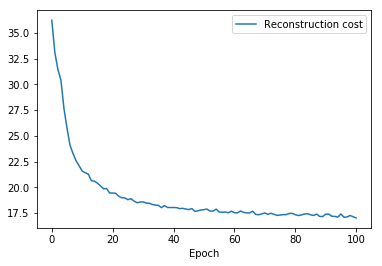

In [107]:
import matplotlib
import matplotlib.pyplot as plt


plt.figure()
plt.plot(reconstruction_cost_valid_array, label='Reconstruction cost')

plt.xlabel('Epoch')
plt.legend()
plt.show()

INFO:tensorflow:Restoring parameters from ./autoencoder_weights.ckpt


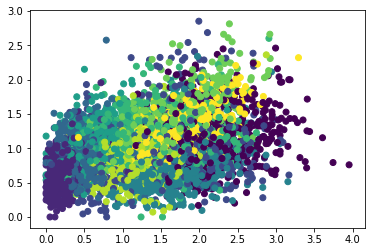

In [110]:
with tf.Session() as sess:
    saver.restore(sess, "./autoencoder_weights.ckpt") 
    z, Y = sess.run([z_mean, outputs], { X: mnist.validation.images })

    #plt.style.use('classic')
    #plt.figure(figsize=(6, 6))
    #plt.axes().set_aspect('equal')
#     plt.xlim(-0.06, 0.06)
#     plt.ylim(-0.06, 0.06)

    plt.scatter(z[:, 0], z[:, 1], c=np.argmax(mnist.validation.labels, axis=1))

    plt.show()

In [111]:
# with tf.Session() as sess:
#     saver.restore(sess, "./autoencoder_weights.ckpt") 
#     z, Y = sess.run([z_mean, outputs], { X: mnist.validation.images })

# import numpy as np
# from sklearn.manifold import TSNE
# z_embedded = TSNE(n_components=2).fit_transform(z)

In [112]:
# plt.figure(figsize=(10, 10))
# plt.axes().set_aspect('equal')
# # plt.xlim(-6, 6)
# # plt.ylim(-6, 6)

# plt.scatter(z_embedded[:, 0], z_embedded[:, 1], c=np.argmax(mnist.validation.labels, axis=1))

# plt.show()

# Rekonstrukcje

In [113]:
n_test_digits = 100    
    
with tf.Session() as sess:
    saver.restore(sess, "./autoencoder_weights.ckpt") 
    X_test = mnist.train.images[:n_test_digits]
    outputs_val = outputs.eval(feed_dict={X: X_test})


INFO:tensorflow:Restoring parameters from ./autoencoder_weights.ckpt


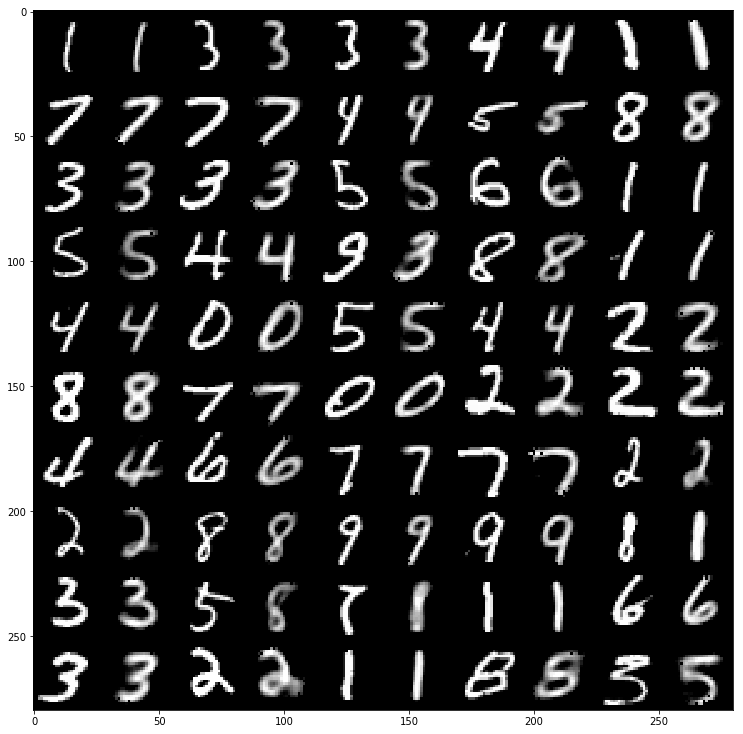

In [114]:
nx = ny = 10

x_values = np.linspace(-2, 2, nx)
y_values = np.linspace(-2, 2, ny)
ind = 0
canvas = np.empty((28*ny, 28*nx))
for i, yi in enumerate(x_values):
    for j, xi in enumerate(y_values):
        if (((j+1) % 2) == 1):
            canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = X_test[ind].reshape(28, 28) 
        else:
            canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = outputs_val[ind].reshape(28, 28) 
            ind +=1
#         print( ((j) % 2) )
            
plt.figure(figsize=(10, 10))   
plt.axes().set_aspect('equal')
plt.imshow(np.clip(canvas,0,1), origin="upper", cmap=plt.cm.gray)
plt.tight_layout(pad=0)
plt.show()

# Variational Autoencoders

Kolejna ważna kategoria autododerów są: wariacyjnych autoencoder **Variational Autoencoders**.

Różnią się one od klasycznych autoencoder, które omówiliśmy do tej pory, w szczególności:

  * Są to probabilistyczne autoencodery, co oznacza, że ich wyniki są częściowo losowe.
  * Co najważniejsze, są to generatywne autoencoder, co oznacza, że mogą generować nowe instancje, które wyglądają, jakby zostały pobrane z zestawu treningowego.


Rzućmy okiem na to, jak działają Variational Autoencoders. Rysunek poniżej (jego lewa część) pokazuje Variational Autoencoders. Można oczywiście rozpoznać podstawową strukturę wszystkich autoencoderów, z enkoderem, po którym następuje dekoder (w tym przykładzie oba mają dwie ukryte warstwy), ale jest pewna różnica: zamiast bezpośredniego tworzenia kodu dla danego wejścia , koder wytwarza średnią $\mu$ i odchylenie standardowe $\sigma$. Rzeczywiste kodowanie jest następnie losowo próbkowane z rozkładu Gaussa ze średnią $\mu$ i odchyleniem standardowym $\sigma$. Następnie dekoder dekoduje normalnie kodowane próbkowanie. 

Prawa część diagramu pokazuje proces jaki przechdzą dane wejściowe przechodzące przez autoencoder. Najpierw enkoder wytwarza $\mu$ i $\sigma$, następnie losowo próbkowane jest kodowanie (zauważ, że nie jest ono dokładnie umiejscowione w $\mu$), i ostatecznie to kodowanie jest dekodowane, a końcowe wyjście przypomina instancję wejściową.

In [115]:
import tensorflow_probability as tfp

In [116]:
from tensorflow.contrib.distributions import MultivariateNormalDiag, kl_divergence

tf.reset_default_graph()

from functools import partial

n_inputs = 28 * 28
n_hidden1 = 200
n_hidden2 = 200
n_hidden3 = 200  
z_dim = 8
n_hidden4 = n_hidden3
n_hidden5 = n_hidden2
n_hidden6 = n_hidden1
n_outputs = n_inputs
learning_rate = 0.001

initializer = tf.contrib.layers.variance_scaling_initializer()

my_dense_layer = partial(
    tf.layers.dense,
    activation=tf.nn.elu,
    kernel_initializer=initializer)

X = tf.placeholder(tf.float32, [None, n_inputs])
hidden1 = my_dense_layer(X, n_hidden1)
hidden2 = my_dense_layer(hidden1, n_hidden2)
hidden3 = my_dense_layer(hidden2, n_hidden3)

z_mean = my_dense_layer(hidden3, z_dim, activation=None)
z_log_var = my_dense_layer(hidden3, z_dim, activation=None)

var_clip_val=3
variance = tf.exp(tf.clip_by_value(z_log_var, -var_clip_val, var_clip_val))
#tensor_z_distr = MultivariateNormalDiag(loc = z_mean, scale_diag= variance)
tensor_z_distr = tfp.distributions.MultivariateNormalDiag(loc = z_mean, scale_diag= variance)
noise = tensor_z_distr.sample()

hidden4 = my_dense_layer(noise, n_hidden4)
hidden5 = my_dense_layer(hidden4, n_hidden5)
hidden6 = my_dense_layer(hidden5, n_hidden6)
outputs = my_dense_layer(hidden6, n_outputs)

target_distribution = tfp.distributions.MultivariateNormalDiag(loc= tf.zeros(z_dim), scale_diag=tf.ones(z_dim))

Dkl = tf.reduce_mean( kl_divergence(tensor_z_distr, target_distribution) )
reconstruction_loss = rec_error(X, outputs)


tensor_cost = tf.reduce_mean(reconstruction_loss + Dkl)

learning_rate = 0.001

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(tensor_cost)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [117]:
n_epochs = 101
batch_size = 128

reconstruction_cost_valid_array = []
DKL_valid_array = []
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        n_batches = mnist.train.num_examples // batch_size
        for iteration in range(n_batches):
            print("\r{}%".format(100 * iteration // n_batches), end="")
            sys.stdout.flush()
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch})

        reconstruction_cost_valid = reconstruction_loss.eval({X: mnist.validation.images})
        DKL_cost_valid = Dkl.eval({X: mnist.validation.images})
        
        print(" ", epoch, "Error:", reconstruction_cost_valid, "DKL:", DKL_cost_valid) 
        reconstruction_cost_valid_array.append(reconstruction_cost_valid)
        DKL_valid_array.append(DKL_cost_valid)
            
        saver.save(sess, "./VAE_weights.ckpt")
        

99%  0 Error: 40.433575 DKL: 15.17013
99%  1 Error: 35.524033 DKL: 11.051339
99%  2 Error: 32.411762 DKL: 9.858348
99%  3 Error: 30.528215 DKL: 9.341161
99%  4 Error: 29.459019 DKL: 9.088917
99%  5 Error: 28.182032 DKL: 8.8216
99%  6 Error: 27.46124 DKL: 8.56922
99%  7 Error: 26.878397 DKL: 8.548363
99%  8 Error: 26.498306 DKL: 8.371593
99%  9 Error: 26.038712 DKL: 8.521833
99%  10 Error: 25.799982 DKL: 8.744079
99%  11 Error: 24.977184 DKL: 8.789572
99%  12 Error: 25.108023 DKL: 8.864299
99%  13 Error: 24.875973 DKL: 9.057269
99%  14 Error: 24.185629 DKL: 9.083642
99%  15 Error: 23.970625 DKL: 9.0744
99%  16 Error: 24.236773 DKL: 8.686042
99%  17 Error: 23.60853 DKL: 9.006936
99%  18 Error: 23.315968 DKL: 9.026631
99%  19 Error: 23.1366 DKL: 9.07927
99%  20 Error: 22.95993 DKL: 9.142697
99%  21 Error: 22.798487 DKL: 9.227239
99%  22 Error: 22.634035 DKL: 9.109806
99%  23 Error: 22.778906 DKL: 9.235855
99%  24 Error: 22.318016 DKL: 9.383077
99%  25 Error: 22.54495 DKL: 9.209725
99%  26

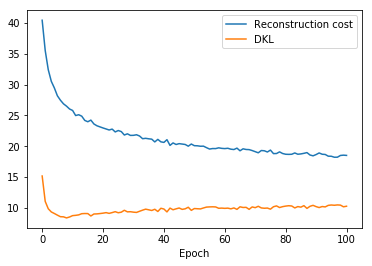

In [118]:
import matplotlib
import matplotlib.pyplot as plt


plt.figure()
plt.plot(reconstruction_cost_valid_array, label='Reconstruction cost')
plt.plot(DKL_valid_array, label='DKL')

plt.xlabel('Epoch')
plt.legend()
plt.show()

In [119]:
with tf.Session() as sess:
    saver.restore(sess, "./VAE_weights.ckpt") 
    z, Y = sess.run([z_mean, outputs], { X: mnist.validation.images })

INFO:tensorflow:Restoring parameters from ./VAE_weights.ckpt


INFO:tensorflow:Restoring parameters from ./VAE_weights.ckpt


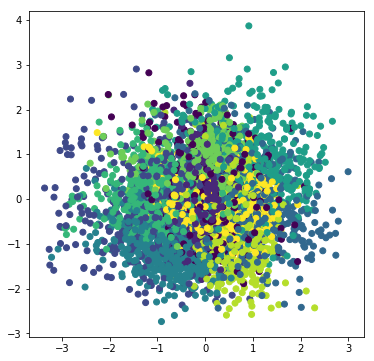

In [120]:
with tf.Session() as sess:
    saver.restore(sess, "./VAE_weights.ckpt") 
    z, Y = sess.run([z_mean, outputs], { X: mnist.validation.images })

    plt.figure(figsize=(6, 6))
#     plt.axes().set_aspect('equal')
    # plt.xlim(-6, 6)
    # plt.ylim(-6, 6)

    plt.scatter(z[:, 0], z[:, 1], c=np.argmax(mnist.validation.labels, axis=1))

    plt.show()

In [121]:
# import numpy as np
# from sklearn.manifold import TSNE
# z_embedded = TSNE(n_components=2).fit_transform(z)

In [122]:
# plt.figure(figsize=(10, 10))
# plt.axes().set_aspect('equal')
# # plt.xlim(-6, 6)
# # plt.ylim(-6, 6)

# plt.scatter(z_embedded[:, 0], z_embedded[:, 1], c=np.argmax(mnist.validation.labels, axis=1))

# plt.show()

# Reconstrukcje

In [123]:
n_test_digits = 100    
    
with tf.Session() as sess:
    saver.restore(sess, "./VAE_weights.ckpt") 
    X_test = mnist.test.images[:n_test_digits]
    outputs_val = outputs.eval(feed_dict={X: X_test})

INFO:tensorflow:Restoring parameters from ./VAE_weights.ckpt


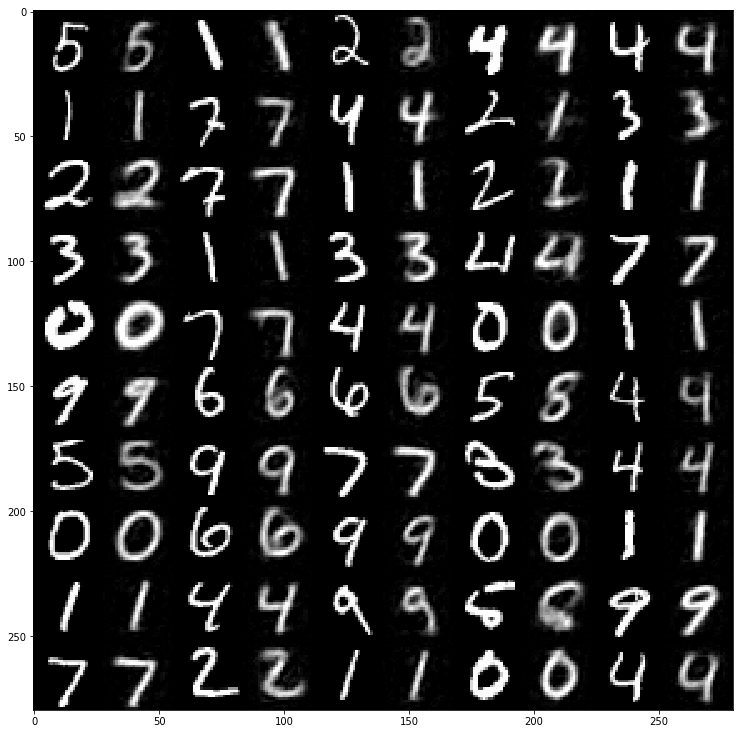

In [124]:
nx = ny = 10

x_values = np.linspace(-2, 2, nx)
y_values = np.linspace(-2, 2, ny)
ind = 0
canvas = np.empty((28*ny, 28*nx))
for i, yi in enumerate(x_values):
    for j, xi in enumerate(y_values):
        if (((j+1) % 2) == 1):
            canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = X_test[ind].reshape(28, 28) 
        else:
            canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = outputs_val[ind].reshape(28, 28) 
            ind +=1
#         print( ((j) % 2) )
            
plt.figure(figsize=(10, 10))   
plt.axes().set_aspect('equal')
plt.imshow(np.clip(canvas,0,1), origin="upper", cmap=plt.cm.gray)
plt.tight_layout(pad=0)
plt.show()

# Próbkowanie

INFO:tensorflow:Restoring parameters from ./VAE_weights.ckpt


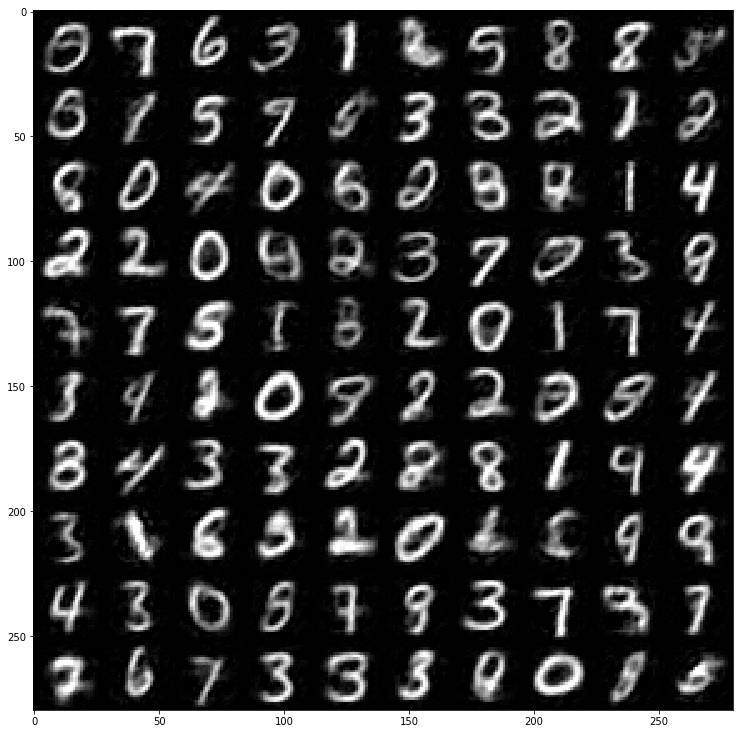

In [125]:
with tf.Session() as sess:
    saver.restore(sess, "./VAE_weights.ckpt") 
    nx = ny = 10

    x_values = np.linspace(-2, 2, nx)
    y_values = np.linspace(-2, 2, ny)

    canvas = np.empty((28*ny, 28*nx))
    for i, yi in enumerate(x_values):
        for j, xi in enumerate(y_values):

            mu, sigma = 0, 1 
            tmp = np.random.normal(mu, sigma, z_dim)
            zz = np.array([tmp])

            yy= sess.run([outputs], { noise: zz })

            canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = yy[0].reshape(28, 28)

    plt.figure(figsize=(10, 10))   
    plt.axes().set_aspect('equal')
    plt.imshow(np.clip(canvas,0,1), origin="upper", cmap=plt.cm.gray)
    plt.tight_layout(pad=0)
    plt.show()

# Interpolacje

INFO:tensorflow:Restoring parameters from ./VAE_weights.ckpt


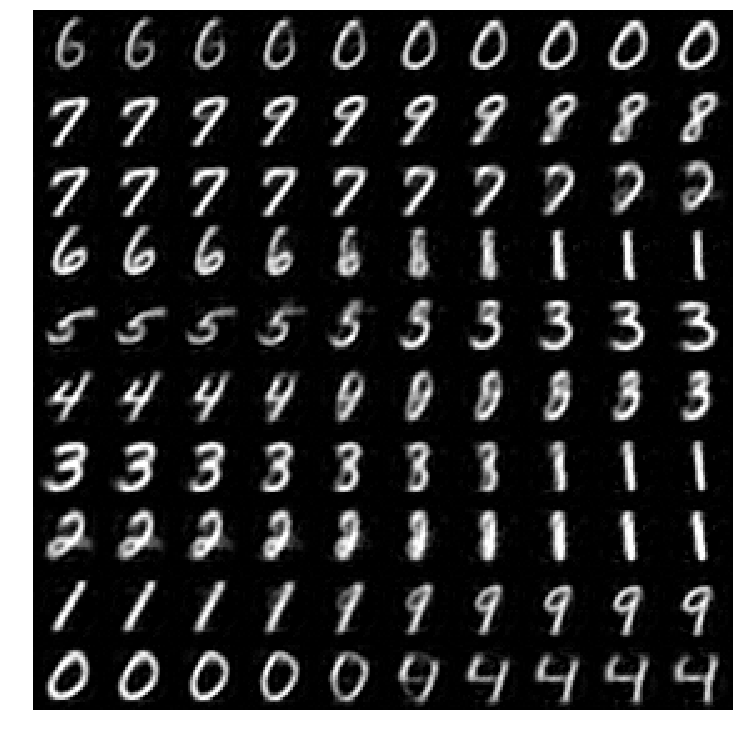

In [126]:
out_z=[[1,2],[3,4],[5,6],[7,8],[9,10],[11,12],[13,14],[15,16],[15,17],[18,1]]


with tf.Session() as sess:
    saver.restore(sess, "./VAE_weights.ckpt") 
    nx = 10
    ny = 10
    n_iterations= nx

    x_values = np.linspace(-2, 2, nx)
    y_values = np.linspace(-2, 2, ny)

    canvas = np.empty((28*ny, 28*nx))
    for i, yi in enumerate(y_values):

        x_sample = mnist.validation.images[out_z[i]]
        out_z1 = sess.run([z_mean], { X: x_sample })
        out_z1=out_z1[0]
        codings_rnd=out_z1[0]
        target_codings = out_z1[1]

        A = np.array(codings_rnd)
        for iteration in np.arange(1,n_iterations):
            codings_interpolate = codings_rnd + (target_codings - codings_rnd) * iteration / n_iterations
            A = np.vstack([A,codings_interpolate])


        y1 = sess.run([outputs], { noise: A })
        y1=y1[0]
        for j, xi in enumerate(x_values):
            d_plot = y1[j]
            d_plot[d_plot<0]=0
            d_plot[d_plot>1]=1
            canvas[(ny-i-1)*28:(ny-i)*28, j*28:(j+1)*28] = d_plot.reshape(28, 28)

    plt.figure(figsize=(10, 10))
    plt.axes().set_aspect('equal')
    plt.axis("off")
    plt.imshow(canvas, origin="upper", cmap=plt.cm.gray)
    plt.tight_layout(pad=0)
    plt.show()

# CWAE

In [127]:
def silverman_rule_of_thumb(N: int):
    return tf.pow(4/(3*N), 0.4)

def euclidean_norm_squared(X, axis=None):
    return tf.reduce_sum(tf.square(X), axis=axis)

def cw_index(X, y=None):
    D = tf.cast(tf.shape(X)[1], tf.float32)
    N = tf.cast(tf.shape(X)[0], tf.float32)
    if y is None:
        y = silverman_rule_of_thumb(N)

    K = 1/(2*D-3)

    A1 = euclidean_norm_squared(tf.subtract(tf.expand_dims(X, 0), tf.expand_dims(X, 1)), axis=2)
    A = (1/(N**2)) * tf.reduce_sum((1/tf.sqrt(y + K*A1)))

    B1 = euclidean_norm_squared(X, axis=1)
    B = (2/N)*tf.reduce_sum((1/tf.sqrt(y + 0.5 + K*B1)))

    return (1/tf.sqrt(1+y)) + A - B

In [128]:
tf.reset_default_graph()

from functools import partial

n_inputs = 28 * 28
n_hidden1 = 200
n_hidden2 = 200
n_hidden3 = 200  
z_dim = 8
n_hidden4 = n_hidden3
n_hidden5 = n_hidden2
n_hidden6 = n_hidden1
n_outputs = n_inputs
learning_rate = 0.001

initializer = tf.contrib.layers.variance_scaling_initializer()

my_dense_layer = partial(
    tf.layers.dense,
    activation=tf.nn.elu,
    kernel_initializer=initializer)

X = tf.placeholder(tf.float32, [None, n_inputs])
hidden1 = my_dense_layer(X, n_hidden1)
hidden2 = my_dense_layer(hidden1, n_hidden2)
hidden3 = my_dense_layer(hidden2, n_hidden3)

z_mean = my_dense_layer(hidden3, z_dim, activation=None)

hidden4 = my_dense_layer(z_mean, n_hidden4)
hidden5 = my_dense_layer(hidden4, n_hidden5)
hidden6 = my_dense_layer(hidden5, n_hidden6)
outputs = my_dense_layer(hidden6, n_outputs)


CW_cost = tf.reduce_mean( cw_index(z_mean) )

# reconstruction_error = tf.reduce_sum(tf.square( X - outputs ))


reconstruction_error = rec_error(X, outputs)

cost = ( reconstruction_error  + tf.log(CW_cost))

learning_rate = 0.001

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(cost)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [129]:
n_epochs = 101
batch_size = 128

reconstruction_cost_valid_array = []
CW_valid_array = []
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        n_batches = mnist.train.num_examples // batch_size
        for iteration in range(n_batches):
            print("\r{}%".format(100 * iteration // n_batches), end="")
            sys.stdout.flush()
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch})

        reconstruction_cost_valid = reconstruction_error.eval({X: mnist.validation.images})
        CW_cost_valid = CW_cost.eval({X: mnist.validation.images})
        
        print(" ", epoch, "Error:", reconstruction_cost_valid, "CW cost:", CW_cost_valid) 
        reconstruction_cost_valid_array.append(reconstruction_cost_valid)
        CW_valid_array.append(CW_cost_valid)
            
        saver.save(sess, "./CWAE_weights.ckpt")
        

99%  0 Error: 32.433804 CW cost: 1.6268406
99%  1 Error: 27.886047 CW cost: 1.2470093
99%  2 Error: 25.30009 CW cost: 0.9643278
99%  3 Error: 23.613218 CW cost: 0.7114847
99%  4 Error: 22.373096 CW cost: 0.49063444
99%  5 Error: 21.494698 CW cost: 0.29319978
99%  6 Error: 20.961039 CW cost: 0.1805718
99%  7 Error: 20.177221 CW cost: 0.13131094
99%  8 Error: 19.871746 CW cost: 0.10875082
99%  9 Error: 19.136133 CW cost: 0.0964371
99%  10 Error: 18.554047 CW cost: 0.08728576
99%  11 Error: 18.418741 CW cost: 0.08239865
99%  12 Error: 17.879456 CW cost: 0.078623176
99%  13 Error: 17.727467 CW cost: 0.076105714
99%  14 Error: 17.47742 CW cost: 0.07358384
99%  15 Error: 17.360443 CW cost: 0.07165837
99%  16 Error: 16.877174 CW cost: 0.06971228
99%  17 Error: 16.791315 CW cost: 0.067802906
99%  18 Error: 16.662607 CW cost: 0.06790984
99%  19 Error: 16.40154 CW cost: 0.06582606
99%  20 Error: 16.034733 CW cost: 0.06496239
99%  21 Error: 15.999909 CW cost: 0.064044595
99%  22 Error: 15.926178 

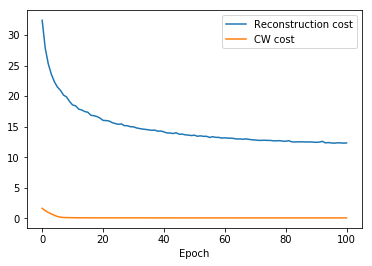

In [130]:
import matplotlib
import matplotlib.pyplot as plt


plt.figure()
plt.plot(reconstruction_cost_valid_array, label='Reconstruction cost')
plt.plot(CW_valid_array, label='CW cost')

plt.xlabel('Epoch')
plt.legend()
plt.show()

In [131]:
with tf.Session() as sess:
    saver.restore(sess, "./CWAE_weights.ckpt") 
    z, Y = sess.run([z_mean, outputs], { X: mnist.validation.images })

INFO:tensorflow:Restoring parameters from ./CWAE_weights.ckpt


INFO:tensorflow:Restoring parameters from ./CWAE_weights.ckpt


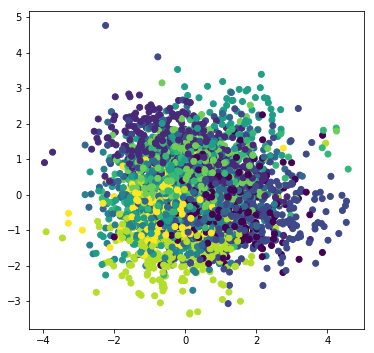

In [132]:
with tf.Session() as sess:
    saver.restore(sess, "./CWAE_weights.ckpt") 
    z, Y = sess.run([z_mean, outputs], { X: mnist.validation.images })

    plt.figure(figsize=(6, 6))
    plt.axes().set_aspect('equal')
    # plt.xlim(-6, 6)
    # plt.ylim(-6, 6)

    plt.scatter(z[:, 0], z[:, 1], c=np.argmax(mnist.validation.labels, axis=1))

    plt.show()

# Reconstrukcje

In [133]:
n_test_digits = 50    
    
with tf.Session() as sess:
    saver.restore(sess, "./CWAE_weights.ckpt") 
    X_test = mnist.train.images[:n_test_digits]
    outputs_val = outputs.eval(feed_dict={X: X_test})

INFO:tensorflow:Restoring parameters from ./CWAE_weights.ckpt


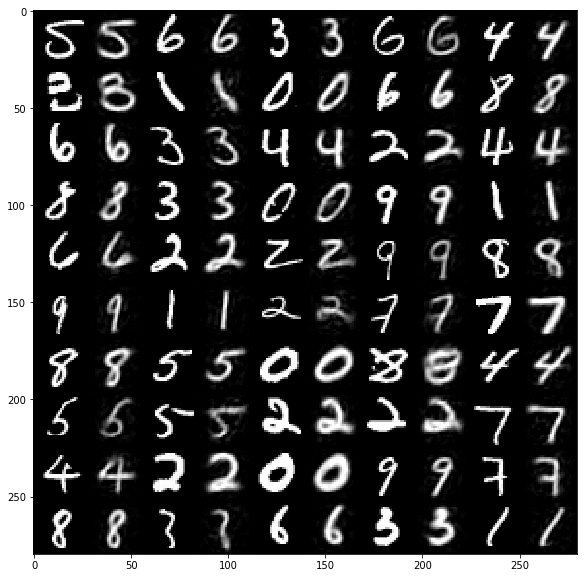

In [134]:
nx = ny = 10

x_values = np.linspace(-2, 2, nx)
y_values = np.linspace(-2, 2, ny)
ind = 0
canvas = np.empty((28*ny, 28*nx))
for i, yi in enumerate(x_values):
    for j, xi in enumerate(y_values):
        if (((j+1) % 2) == 1):
            canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = X_test[ind].reshape(28, 28) 
        else:
            canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = outputs_val[ind].reshape(28, 28) 
            ind +=1
#         print( ((j) % 2) )
            
plt.figure(figsize=(10, 10))   
plt.axes().set_aspect('equal')
plt.imshow(np.clip(canvas,0,1), origin="upper", cmap=plt.cm.gray)
# plt.tight_layout(pad=0)
plt.show()

# Próbkowanie

INFO:tensorflow:Restoring parameters from CWAE_weights.ckpt


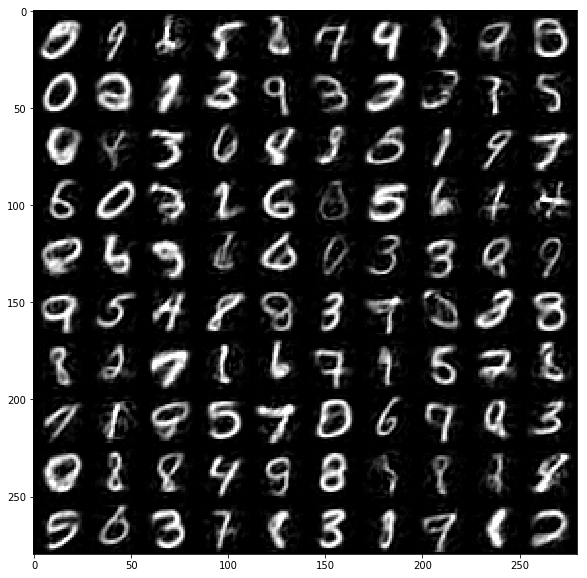

In [135]:
with tf.Session() as sess:
    saver.restore(sess, "CWAE_weights.ckpt") 
    nx = ny = 10

    x_values = np.linspace(-2, 2, nx)
    y_values = np.linspace(-2, 2, ny)

    canvas = np.empty((28*ny, 28*nx))
    for i, yi in enumerate(x_values):
        for j, xi in enumerate(y_values):

            mu, sigma = 0, 1 
            tmp = np.random.normal(mu, sigma, z_dim)
            zz = np.array([tmp])

            yy= sess.run([outputs], { z_mean: zz })

            canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = yy[0].reshape(28, 28)

    plt.figure(figsize=(10, 10))   
    plt.axes().set_aspect('equal')
    plt.imshow(np.clip(canvas,0,1), origin="upper", cmap=plt.cm.gray)
#     plt.tight_layout(pad=0)
    plt.show()

# Interpolacje

INFO:tensorflow:Restoring parameters from ./CWAE_weights.ckpt


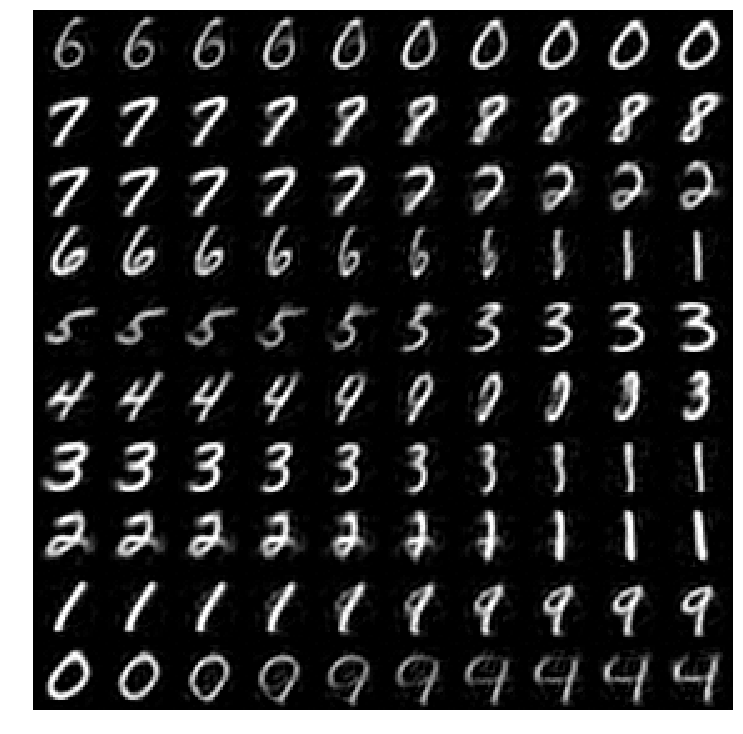

In [136]:
out_z=[[1,2],[3,4],[5,6],[7,8],[9,10],[11,12],[13,14],[15,16],[15,17],[18,1]]


with tf.Session() as sess:
    saver.restore(sess, "./CWAE_weights.ckpt") 
    nx = 10
    ny = 10
    n_iterations= nx

    x_values = np.linspace(-2, 2, nx)
    y_values = np.linspace(-2, 2, ny)

    canvas = np.empty((28*ny, 28*nx))
    for i, yi in enumerate(y_values):

        x_sample = mnist.validation.images[out_z[i]]
        out_z1 = sess.run([z_mean], { X: x_sample })
        out_z1=out_z1[0]
        codings_rnd=out_z1[0]
        target_codings = out_z1[1]

        A = np.array(codings_rnd)
        for iteration in np.arange(1,n_iterations):
            codings_interpolate = codings_rnd + (target_codings - codings_rnd) * iteration / n_iterations
            A = np.vstack([A,codings_interpolate])


        y1 = sess.run([outputs], { z_mean: A })
        y1=y1[0]
        for j, xi in enumerate(x_values):
            d_plot = y1[j]
            d_plot[d_plot<0]=0
            d_plot[d_plot>1]=1
            canvas[(ny-i-1)*28:(ny-i)*28, j*28:(j+1)*28] = d_plot.reshape(28, 28)

    plt.figure(figsize=(10, 10))
    plt.axes().set_aspect('equal')
    plt.axis("off")
    plt.imshow(np.clip(canvas,0,1), origin="upper", cmap=plt.cm.gray)
    plt.tight_layout(pad=0)
    plt.show()

# Wasserstein Auto-Encoders

https://github.com/tolstikhin/wae/blob/master/wae.py

In [137]:
def mmd_penalty(sample_qz, sample_pz):
    sigma2_p = 1. ** 2
    kernel = 'IMQ'

    n = tf.cast(tf.shape(sample_qz)[0], tf.float32)#utils.get_batch_size(sample_qz)
    d = tf.cast(tf.shape(sample_qz)[1], tf.float32)

    n = tf.cast(n, tf.int32)
    nf = tf.cast(n, tf.float32)
    half_size = (n * n - n) / 2

    norms_pz = tf.reduce_sum(tf.square(sample_pz), axis=1, keep_dims=True)
    dotprods_pz = tf.matmul(sample_pz, sample_pz, transpose_b=True)
    distances_pz = norms_pz + tf.transpose(norms_pz) - 2. * dotprods_pz

    norms_qz = tf.reduce_sum(tf.square(sample_qz), axis=1, keep_dims=True)
    dotprods_qz = tf.matmul(sample_qz, sample_qz, transpose_b=True)
    distances_qz = norms_qz + tf.transpose(norms_qz) - 2. * dotprods_qz

    dotprods = tf.matmul(sample_qz, sample_pz, transpose_b=True)
    distances = norms_qz + tf.transpose(norms_pz) - 2. * dotprods

    if kernel == 'RBF':
        # Median heuristic for the sigma^2 of Gaussian kernel
        sigma2_k = tf.nn.top_k(
            tf.reshape(distances, [-1]), half_size).values[half_size - 1]
        sigma2_k += tf.nn.top_k(
            tf.reshape(distances_qz, [-1]), half_size).values[half_size - 1]
        # Maximal heuristic for the sigma^2 of Gaussian kernel
        # sigma2_k = tf.nn.top_k(tf.reshape(distances_qz, [-1]), 1).values[0]
        # sigma2_k += tf.nn.top_k(tf.reshape(distances, [-1]), 1).values[0]
        # sigma2_k = opts['latent_space_dim'] * sigma2_p
        res1 = tf.exp(- distances_qz / 2. / sigma2_k)
        res1 += tf.exp(- distances_pz / 2. / sigma2_k)
        res1 = tf.multiply(res1, 1. - tf.eye(n))
        res1 = tf.reduce_sum(res1) / (nf * nf - nf)
        res2 = tf.exp(- distances / 2. / sigma2_k)
        res2 = tf.reduce_sum(res2) * 2. / (nf * nf)
        stat = res1 - res2
    elif kernel == 'IMQ':
        # k(x, y) = C / (C + ||x - y||^2)
        # C = tf.nn.top_k(tf.reshape(distances, [-1]), half_size).values[half_size - 1]
        # C += tf.nn.top_k(tf.reshape(distances_qz, [-1]), half_size).values[half_size - 1]
        #if opts['pz'] == 'normal':
        Cbase = 2. * d * sigma2_p
        #elif opts['pz'] == 'sphere':
        #    Cbase = 2.
        #elif opts['pz'] == 'uniform':
            # E ||x - y||^2 = E[sum (xi - yi)^2]
            #               = zdim E[(xi - yi)^2]
            #               = const * zdim
        #    Cbase = opts['zdim']
        stat = 0.
        for scale in [.1, .2, .5, 1., 2., 5., 10.]:
            C = Cbase * scale
            res1 = C / (C + distances_qz)
            res1 += C / (C + distances_pz)
            res1 = tf.multiply(res1, 1. - tf.eye(n))
            res1 = tf.reduce_sum(res1) / (nf * nf - nf)
            res2 = C / (C + distances)
            res2 = tf.reduce_sum(res2) * 2. / (nf * nf)
            stat += res1 - res2
    return stat


In [152]:
tf.reset_default_graph()

from functools import partial

n_inputs = 28 * 28
n_hidden1 = 200
n_hidden2 = 200
n_hidden3 = 200  
z_dim = 8
n_hidden4 = n_hidden3
n_hidden5 = n_hidden2
n_hidden6 = n_hidden1
n_outputs = n_inputs
learning_rate = 0.001

initializer = tf.contrib.layers.variance_scaling_initializer()

my_dense_layer = partial(
    tf.layers.dense,
    activation=tf.nn.elu,
    kernel_initializer=initializer)

X = tf.placeholder(tf.float32, [None, n_inputs])
sample_z = tf.placeholder(shape=np.append([None], z_dim), dtype=tf.float32, name='input_z')
hidden1 = my_dense_layer(X, n_hidden1)
hidden2 = my_dense_layer(hidden1, n_hidden2)
hidden3 = my_dense_layer(hidden2, n_hidden3)

z_mean = my_dense_layer(hidden3, z_dim, activation=None)

hidden4 = my_dense_layer(z_mean, n_hidden4)
hidden5 = my_dense_layer(hidden4, n_hidden5)
hidden6 = my_dense_layer(hidden5, n_hidden6)
outputs = my_dense_layer(hidden6, n_outputs)


WAE_cost = tf.reduce_mean(  mmd_penalty(sample_z, z_mean) )

reconstruction_error = rec_error(X, outputs)

cost = ( reconstruction_error  + (WAE_cost))

learning_rate = 0.001

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(cost)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [141]:
n_epochs = 101
batch_size = 128

reconstruction_cost_valid_array = []
W_valid_array = []
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        n_batches = mnist.train.num_examples // batch_size
        for iteration in range(n_batches):
            print("\r{}%".format(100 * iteration // n_batches), end="")
            sys.stdout.flush()
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            
            mean = np.zeros(z_dim)
            cov = np.identity(z_dim)
            num = X_batch.shape[0]
            noise = np.random.multivariate_normal( mean, cov, num).astype(np.float32)

            
            sess.run(training_op, feed_dict={X: X_batch, sample_z: noise})

            
        mean = np.zeros(z_dim)
        cov = np.identity(z_dim)
        num = mnist.validation.images.shape[0]
        noise = np.random.multivariate_normal( mean, cov, num).astype(np.float32)

        reconstruction_cost_valid = reconstruction_error.eval({X: mnist.validation.images, sample_z: noise})
        W_cost_valid = WAE_cost.eval({X: mnist.validation.images, sample_z: noise})
        
        print(" ", epoch, "Error:", reconstruction_cost_valid, "WAE cost:", W_cost_valid) 
        reconstruction_cost_valid_array.append(reconstruction_cost_valid)
        W_valid_array.append(W_cost_valid)
            
        saver.save(sess, "./WAE_weights.ckpt")
        



99%  0 Error: 32.041344 WAE cost: 1.2918643
99%  1 Error: 27.330421 WAE cost: 1.0562123
99%  2 Error: 24.78183 WAE cost: 0.8526019
99%  3 Error: 23.289938 WAE cost: 0.71748424
99%  4 Error: 22.084234 WAE cost: 0.5633713
99%  5 Error: 21.411787 WAE cost: 0.46470785
99%  6 Error: 20.669226 WAE cost: 0.35634515
99%  7 Error: 20.081127 WAE cost: 0.2801907
99%  8 Error: 19.483316 WAE cost: 0.22473955
99%  9 Error: 18.957153 WAE cost: 0.16732821
99%  10 Error: 18.583685 WAE cost: 0.15160781
99%  11 Error: 18.125557 WAE cost: 0.11485407
99%  12 Error: 17.830303 WAE cost: 0.102795586
99%  13 Error: 17.599207 WAE cost: 0.09337032
99%  14 Error: 17.26055 WAE cost: 0.07840893
99%  15 Error: 17.173275 WAE cost: 0.07602012
99%  16 Error: 16.866493 WAE cost: 0.0738543
99%  17 Error: 16.706474 WAE cost: 0.069163814
99%  18 Error: 16.480274 WAE cost: 0.061858147
99%  19 Error: 16.298952 WAE cost: 0.06064473
99%  20 Error: 15.939845 WAE cost: 0.060685694
99%  21 Error: 15.855112 WAE cost: 0.06471476
99

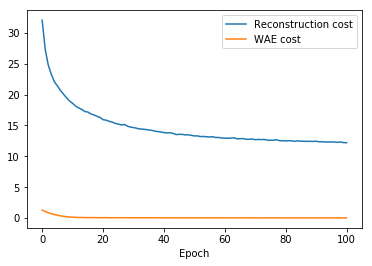

In [142]:
import matplotlib
import matplotlib.pyplot as plt


plt.figure()
plt.plot(reconstruction_cost_valid_array, label='Reconstruction cost')
plt.plot(W_valid_array, label='WAE cost')

plt.xlabel('Epoch')
plt.legend()
plt.show()

INFO:tensorflow:Restoring parameters from ./WAE_weights.ckpt


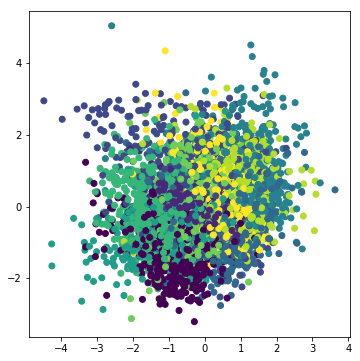

In [143]:
with tf.Session() as sess:
    saver.restore(sess, "./WAE_weights.ckpt") 
    z, Y = sess.run([z_mean, outputs], { X: mnist.validation.images })

    plt.figure(figsize=(6, 6))
    plt.axes().set_aspect('equal')
    # plt.xlim(-6, 6)
    # plt.ylim(-6, 6)

    plt.scatter(z[:, 0], z[:, 1], c=np.argmax(mnist.validation.labels, axis=1))

    plt.show()

# Reconstrukcje

In [144]:
n_test_digits = 50    
    
with tf.Session() as sess:
    saver.restore(sess, "./WAE_weights.ckpt") 
    X_test = mnist.train.images[:n_test_digits]
    outputs_val = outputs.eval(feed_dict={X: X_test})

INFO:tensorflow:Restoring parameters from ./WAE_weights.ckpt


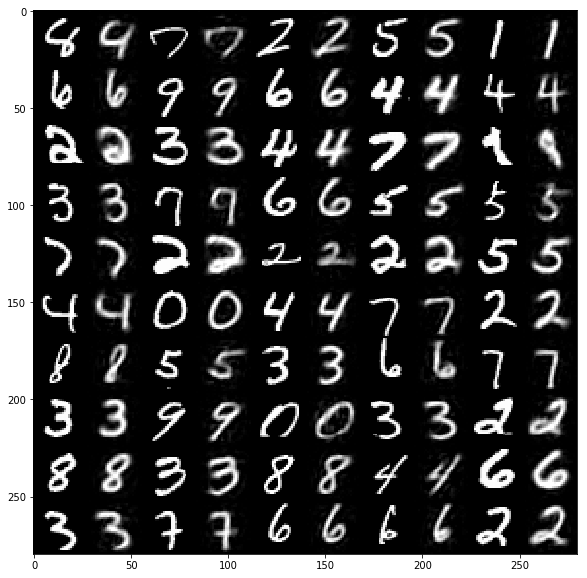

In [145]:
nx = ny = 10

x_values = np.linspace(-2, 2, nx)
y_values = np.linspace(-2, 2, ny)
ind = 0
canvas = np.empty((28*ny, 28*nx))
for i, yi in enumerate(x_values):
    for j, xi in enumerate(y_values):
        if (((j+1) % 2) == 1):
            canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = X_test[ind].reshape(28, 28) 
        else:
            canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = outputs_val[ind].reshape(28, 28) 
            ind +=1
#         print( ((j) % 2) )
            
plt.figure(figsize=(10, 10))   
plt.axes().set_aspect('equal')
plt.imshow(np.clip(canvas,0,1), origin="upper", cmap=plt.cm.gray)
# plt.tight_layout(pad=0)
plt.show()

# Próbkowanie

INFO:tensorflow:Restoring parameters from WAE_weights.ckpt


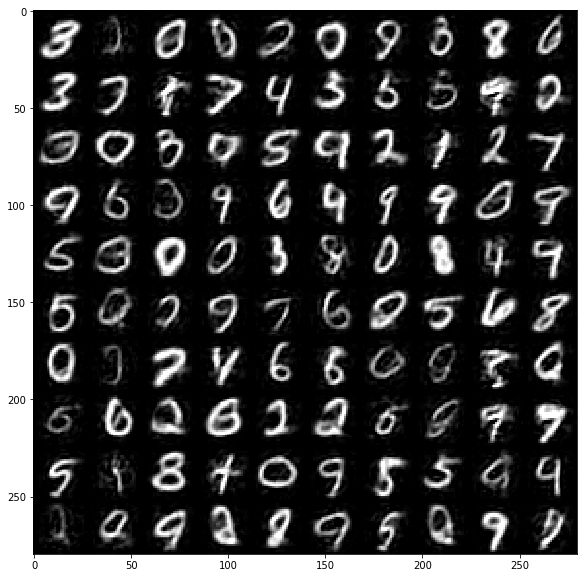

In [146]:
with tf.Session() as sess:
    saver.restore(sess, "WAE_weights.ckpt") 
    nx = ny = 10

    x_values = np.linspace(-2, 2, nx)
    y_values = np.linspace(-2, 2, ny)

    canvas = np.empty((28*ny, 28*nx))
    for i, yi in enumerate(x_values):
        for j, xi in enumerate(y_values):

            mu, sigma = 0, 1 
            tmp = np.random.normal(mu, sigma, z_dim)
            zz = np.array([tmp])

            yy= sess.run([outputs], { z_mean: zz })

            canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = yy[0].reshape(28, 28)

    plt.figure(figsize=(10, 10))   
    plt.axes().set_aspect('equal')
    plt.imshow(np.clip(canvas,0,1), origin="upper", cmap=plt.cm.gray)
#     plt.tight_layout(pad=0)
    plt.show()

# Interpolacje

INFO:tensorflow:Restoring parameters from ./WAE_weights.ckpt


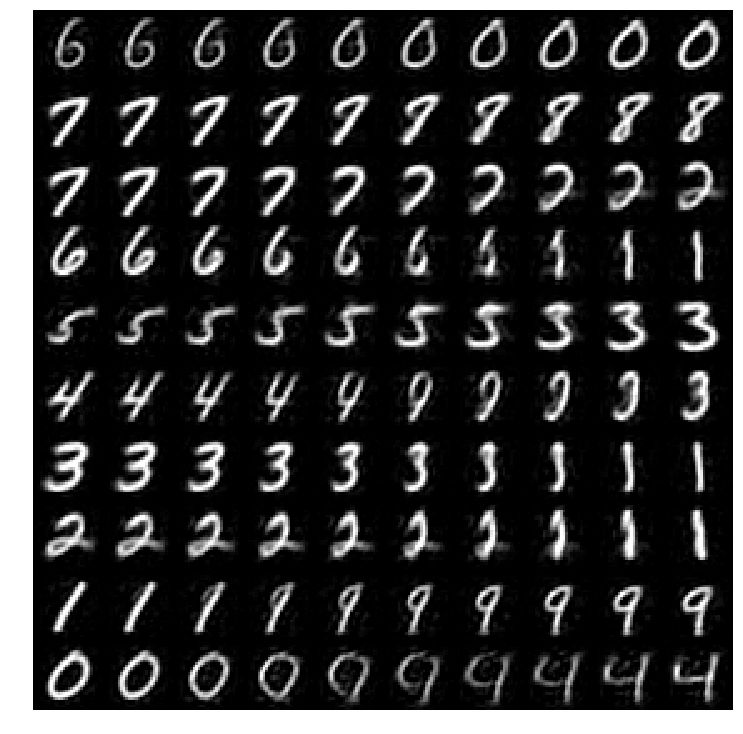

In [147]:
out_z=[[1,2],[3,4],[5,6],[7,8],[9,10],[11,12],[13,14],[15,16],[15,17],[18,1]]


with tf.Session() as sess:
    saver.restore(sess, "./WAE_weights.ckpt") 
    nx = 10
    ny = 10
    n_iterations= nx

    x_values = np.linspace(-2, 2, nx)
    y_values = np.linspace(-2, 2, ny)

    canvas = np.empty((28*ny, 28*nx))
    for i, yi in enumerate(y_values):

        x_sample = mnist.validation.images[out_z[i]]
        out_z1 = sess.run([z_mean], { X: x_sample })
        out_z1=out_z1[0]
        codings_rnd=out_z1[0]
        target_codings = out_z1[1]

        A = np.array(codings_rnd)
        for iteration in np.arange(1,n_iterations):
            codings_interpolate = codings_rnd + (target_codings - codings_rnd) * iteration / n_iterations
            A = np.vstack([A,codings_interpolate])


        y1 = sess.run([outputs], { z_mean: A })
        y1=y1[0]
        for j, xi in enumerate(x_values):
            d_plot = y1[j]
            d_plot[d_plot<0]=0
            d_plot[d_plot>1]=1
            canvas[(ny-i-1)*28:(ny-i)*28, j*28:(j+1)*28] = d_plot.reshape(28, 28)

    plt.figure(figsize=(10, 10))
    plt.axes().set_aspect('equal')
    plt.axis("off")
    plt.imshow(canvas, origin="upper", cmap=plt.cm.gray)
    plt.tight_layout(pad=0)
    plt.show()

# Sliced-Wasserstein Autoencoder

https://arxiv.org/pdf/1804.01947.pdf

In [167]:
def SWAE_cost(aencoded, sample, theta):
    n = tf.cast(tf.shape(aencoded)[0], tf.int32)
    # Let projae be the projection of the encoded samples
    projae=tf.keras.backend.dot(aencoded, tf.transpose(theta))
    # Let projz be the projection of the $q_Z$ samples
    projz=tf.keras.backend.dot(sample, tf.transpose(theta))
    # Calculate the Sliced Wasserstein distance by sorting
    # the projections and calculating the L2 distance between
    W2=(tf.nn.top_k(tf.transpose(projae),k=n).values-
        tf.nn.top_k(tf.transpose(projz),k=n).values)**2
    return( tf.reduce_mean(W2) )

def generateTheta(L,endim):
    # This function generates L random samples from the unit `ndim'-u
    theta=[w/np.sqrt((w**2).sum()) for w in np.random.normal(size=(L,endim))]
    return np.asarray(theta)

def generateZ(batchsize):
    # This function generates 2D samples from a `circle' distribution in
    # a 2-dimensional space
    temp=make_circles(2*batchsize,noise=.01)
    return np.squeeze(temp[0][np.argwhere(temp[1]==0),:])

In [168]:
tf.reset_default_graph()

from functools import partial

n_inputs = 28 * 28
n_hidden1 = 200
n_hidden2 = 200
n_hidden3 = 200  
z_dim = 8
n_hidden4 = n_hidden3
n_hidden5 = n_hidden2
n_hidden6 = n_hidden1
n_outputs = n_inputs
learning_rate = 0.001

initializer = tf.contrib.layers.variance_scaling_initializer()

my_dense_layer = partial(
    tf.layers.dense,
    activation=tf.nn.elu,
    kernel_initializer=initializer)

X = tf.placeholder(tf.float32, [None, n_inputs])
sample_z = tf.placeholder(shape=np.append([None], z_dim), dtype=tf.float32, name='input_z')
theta_tensor = tf.placeholder(shape=np.append([None], z_dim), dtype=tf.float32, name='input_theta')

hidden1 = my_dense_layer(X, n_hidden1)
hidden2 = my_dense_layer(hidden1, n_hidden2)
hidden3 = my_dense_layer(hidden2, n_hidden3)

z_mean = my_dense_layer(hidden3, z_dim, activation=None)

hidden4 = my_dense_layer(z_mean, n_hidden4)
hidden5 = my_dense_layer(hidden4, n_hidden5)
hidden6 = my_dense_layer(hidden5, n_hidden6)
outputs = my_dense_layer(hidden6, n_outputs)


SWAE_cost = tf.reduce_mean(SWAE_cost(aencoded = z_mean, sample = sample_z, theta = theta_tensor))

reconstruction_error = rec_error(X, outputs)

cost = ( reconstruction_error  + (SWAE_cost))

learning_rate = 0.001

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(cost)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [169]:
n_epochs = 101
batch_size = 128
L = 50

reconstruction_cost_valid_array = []
SW_valid_array = []
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        n_batches = mnist.train.num_examples // batch_size
        for iteration in range(n_batches):
            print("\r{}%".format(100 * iteration // n_batches), end="")
            sys.stdout.flush()
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            
            mean = np.zeros(z_dim)
            cov = np.identity(z_dim)
            num = X_batch.shape[0]
            noise = np.random.multivariate_normal( mean, cov, num).astype(np.float32)
            
            theta_=generateTheta(L,z_dim)
            
            sess.run(training_op, feed_dict={X: X_batch, sample_z: noise, theta_tensor: theta_})

            
        mean = np.zeros(z_dim)
        cov = np.identity(z_dim)
        num = mnist.validation.images.shape[0]
        noise = np.random.multivariate_normal( mean, cov, num).astype(np.float32)

        reconstruction_cost_valid = reconstruction_error.eval({X: mnist.validation.images, sample_z: noise, theta_tensor: theta_})
        SW_cost_valid = SWAE_cost.eval({X: mnist.validation.images, sample_z: noise, theta_tensor: theta_})
        
        print(" ", epoch, "Error:", reconstruction_cost_valid, "SWAE cost:", SW_cost_valid) 
        reconstruction_cost_valid_array.append(reconstruction_cost_valid)
        SW_valid_array.append(SW_cost_valid)
            
        saver.save(sess, "./SWAE_weights.ckpt")
        

99%  0 Error: 32.949394 SWAE cost: 0.6673827
99%  1 Error: 28.2116 SWAE cost: 0.6489946
99%  2 Error: 25.756184 SWAE cost: 0.57169765
99%  3 Error: 24.108831 SWAE cost: 0.50238496
99%  4 Error: 22.857418 SWAE cost: 0.4656473
99%  5 Error: 21.992607 SWAE cost: 0.38555396
99%  6 Error: 21.212584 SWAE cost: 0.3686579
99%  7 Error: 20.598213 SWAE cost: 0.3297071
99%  8 Error: 20.230946 SWAE cost: 0.27467155
99%  9 Error: 19.691757 SWAE cost: 0.25974753
99%  10 Error: 19.420895 SWAE cost: 0.22613144
99%  11 Error: 18.834 SWAE cost: 0.17471178
99%  12 Error: 18.485962 SWAE cost: 0.1517548
99%  13 Error: 18.043638 SWAE cost: 0.12514119
99%  14 Error: 17.797247 SWAE cost: 0.11795231
99%  15 Error: 17.60005 SWAE cost: 0.10266342
99%  16 Error: 17.2282 SWAE cost: 0.07684889
99%  17 Error: 16.904984 SWAE cost: 0.07664802
99%  18 Error: 16.735294 SWAE cost: 0.056294672
99%  19 Error: 16.594948 SWAE cost: 0.05660687
99%  20 Error: 16.188768 SWAE cost: 0.05276394
99%  21 Error: 16.118319 SWAE cost: 

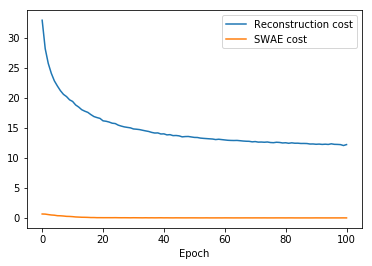

In [172]:
import matplotlib
import matplotlib.pyplot as plt


plt.figure()
plt.plot(reconstruction_cost_valid_array, label='Reconstruction cost')
plt.plot(SW_valid_array, label='SWAE cost')

plt.xlabel('Epoch')
plt.legend()
plt.show()

INFO:tensorflow:Restoring parameters from ./SWAE_weights.ckpt


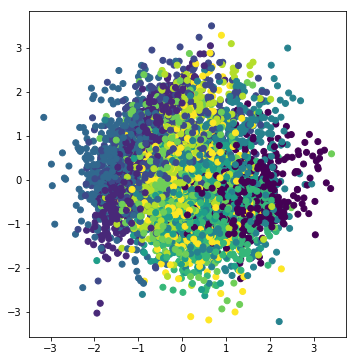

In [173]:
with tf.Session() as sess:
    saver.restore(sess, "./SWAE_weights.ckpt") 
    z, Y = sess.run([z_mean, outputs], { X: mnist.validation.images })

    plt.figure(figsize=(6, 6))
    plt.axes().set_aspect('equal')
    # plt.xlim(-6, 6)
    # plt.ylim(-6, 6)

    plt.scatter(z[:, 0], z[:, 1], c=np.argmax(mnist.validation.labels, axis=1))

    plt.show()

# Reconstrukcje

In [174]:
n_test_digits = 50    
    
with tf.Session() as sess:
    saver.restore(sess, "./SWAE_weights.ckpt") 
    X_test = mnist.train.images[:n_test_digits]
    outputs_val = outputs.eval(feed_dict={X: X_test})

INFO:tensorflow:Restoring parameters from ./SWAE_weights.ckpt


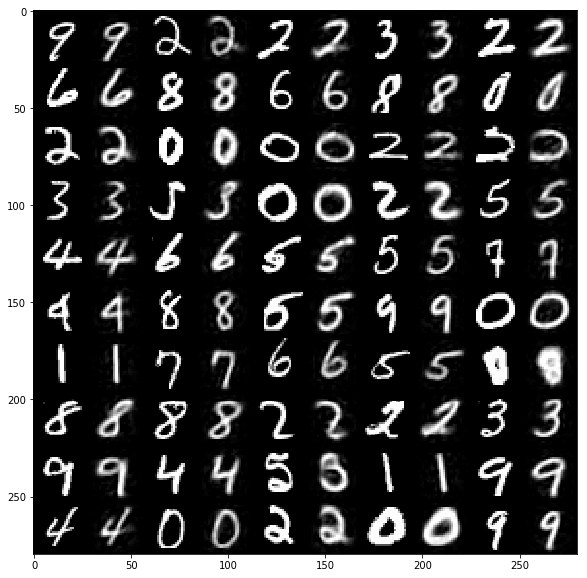

In [175]:
nx = ny = 10

x_values = np.linspace(-2, 2, nx)
y_values = np.linspace(-2, 2, ny)
ind = 0
canvas = np.empty((28*ny, 28*nx))
for i, yi in enumerate(x_values):
    for j, xi in enumerate(y_values):
        if (((j+1) % 2) == 1):
            canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = X_test[ind].reshape(28, 28) 
        else:
            canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = outputs_val[ind].reshape(28, 28) 
            ind +=1
#         print( ((j) % 2) )
            
plt.figure(figsize=(10, 10))   
plt.axes().set_aspect('equal')
plt.imshow(np.clip(canvas,0,1), origin="upper", cmap=plt.cm.gray)
# plt.tight_layout(pad=0)
plt.show()

# Próbkowanie

INFO:tensorflow:Restoring parameters from SWAE_weights.ckpt


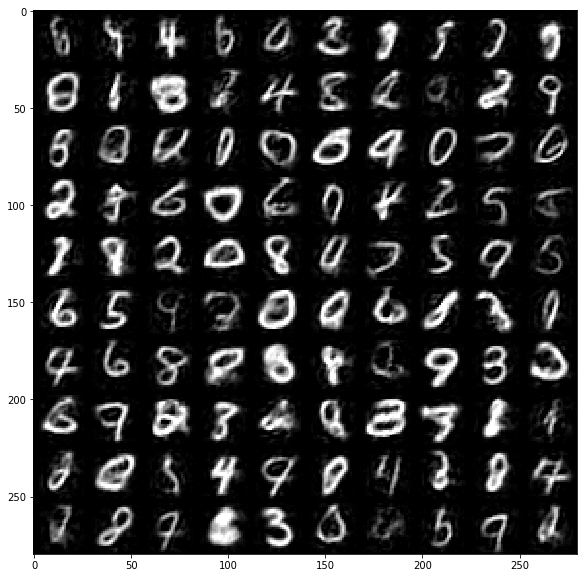

In [176]:
with tf.Session() as sess:
    saver.restore(sess, "SWAE_weights.ckpt") 
    nx = ny = 10

    x_values = np.linspace(-2, 2, nx)
    y_values = np.linspace(-2, 2, ny)

    canvas = np.empty((28*ny, 28*nx))
    for i, yi in enumerate(x_values):
        for j, xi in enumerate(y_values):

            mu, sigma = 0, 1 
            tmp = np.random.normal(mu, sigma, z_dim)
            zz = np.array([tmp])

            yy= sess.run([outputs], { z_mean: zz })

            canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = yy[0].reshape(28, 28)

    plt.figure(figsize=(10, 10))   
    plt.axes().set_aspect('equal')
    plt.imshow(np.clip(canvas,0,1), origin="upper", cmap=plt.cm.gray)
#     plt.tight_layout(pad=0)
    plt.show()

# Interpolacje

INFO:tensorflow:Restoring parameters from ./SWAE_weights.ckpt


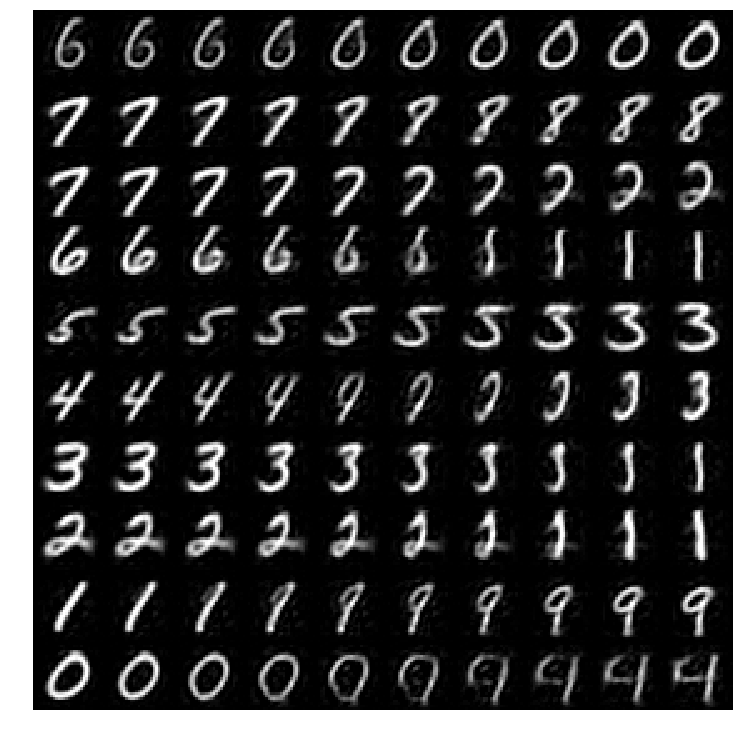

In [177]:
out_z=[[1,2],[3,4],[5,6],[7,8],[9,10],[11,12],[13,14],[15,16],[15,17],[18,1]]


with tf.Session() as sess:
    saver.restore(sess, "./SWAE_weights.ckpt") 
    nx = 10
    ny = 10
    n_iterations= nx

    x_values = np.linspace(-2, 2, nx)
    y_values = np.linspace(-2, 2, ny)

    canvas = np.empty((28*ny, 28*nx))
    for i, yi in enumerate(y_values):

        x_sample = mnist.validation.images[out_z[i]]
        out_z1 = sess.run([z_mean], { X: x_sample })
        out_z1=out_z1[0]
        codings_rnd=out_z1[0]
        target_codings = out_z1[1]

        A = np.array(codings_rnd)
        for iteration in np.arange(1,n_iterations):
            codings_interpolate = codings_rnd + (target_codings - codings_rnd) * iteration / n_iterations
            A = np.vstack([A,codings_interpolate])


        y1 = sess.run([outputs], { z_mean: A })
        y1=y1[0]
        for j, xi in enumerate(x_values):
            d_plot = y1[j]
            d_plot[d_plot<0]=0
            d_plot[d_plot>1]=1
            canvas[(ny-i-1)*28:(ny-i)*28, j*28:(j+1)*28] = d_plot.reshape(28, 28)

    plt.figure(figsize=(10, 10))
    plt.axes().set_aspect('equal')
    plt.axis("off")
    plt.imshow(canvas, origin="upper", cmap=plt.cm.gray)
    plt.tight_layout(pad=0)
    plt.show()